In [1]:
import os
from importlib import reload

import pandas as pd

In [2]:
from analysis.timescales import compute_taus_growing
reload(compute_taus_growing)

<module 'analysis.timescales.compute_taus_growing' from '/raven/u/mhami/rnn_timescale_public/analysis/timescales/compute_taus_growing.py'>

In [3]:
slurm_path = os.path.abspath("./trained_models/SLURM_ARRAY_JOB_ID=7669330_Mar-05-2024-13_14_48")
paths = compute_taus_growing.resolve_paths(slurm_path)


100%|██████████| 1250/1250 [00:00<00:00, 165442.73it/s]


In [4]:
list(paths.keys())[:5]

['643_grow_parity__2024-Mar-05-13_20_19',
 '1156_grow_parity__2024-Mar-05-13_26_11',
 '507_grow_parity__2024-Mar-05-13_18_33',
 '1099_grow_parity__2024-Mar-05-13_26_16',
 '566_grow_parity__2024-Mar-05-13_19_44']

In [5]:
paths['643_grow_parity__2024-Mar-05-13_20_19']

['rnn_1_N5',
 'rnn_1_N2',
 'configs.json',
 'rnn_1_N16',
 'rnn_1_N22',
 'stats.npy',
 'rnn_1_N20',
 'rnn_1_N6',
 'rnn_1_N3',
 'rnn_1_N15',
 'rnn_1_N17',
 'rnn_1_N8',
 'rnn_0_init',
 'rnn_1_N21',
 'rnn_1_N11',
 'rnn_1_N12',
 'rnn_1_N18',
 'rnn_1_N19',
 'rnn_1_N7',
 'rnn_1_N4',
 'rnn_1_N9',
 'rnn_1_N14',
 'rnn_1_N13',
 'rnn_1_N10']

In [6]:
configs, stats = compute_taus_growing.get_all_configs_and_stats(slurm_directory=slurm_path)

100%|██████████| 1250/1250 [00:02<00:00, 447.30it/s]


In [7]:
for stat in stats:
    stat['len_accuracies'] = list(map(lambda x: len(x), stat['accuracy']))

In [8]:
configs_df = pd.DataFrame(configs)
stats_df = pd.DataFrame(stats)

In [9]:
stats_df

,loss,accuracy,time,epochs,max_N,subdir,len_accuracies
0,"[0.13188420415855945, 0.1876632080078125, 0.15...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[174.9330472946167, 415.98202109336853, 815.61...",28,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",643_grow_parity__2024-Mar-05-13_20_19,"[1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 8, 9, 10, 10..."
1,"[0.2883076078891754, 0.2760491908416152, 0.199...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[193.2250006198883, 473.14977407455444, 870.82...",21,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1156_grow_parity__2024-Mar-05-13_26_11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,"[0.06665384598751553, 0.0747792279162677, 0.06...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[191.15922737121582, 472.0433111190796, 1055.0...",20,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",507_grow_parity__2024-Mar-05-13_18_33,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,"[0.17909324598498644, 0.25991281381621956, 0.1...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[127.32323098182678, 366.1205279827118, 839.76...",20,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1099_grow_parity__2024-Mar-05-13_26_16,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,"[0.46677773460745814, 0.11184300154447556, 0.3...","[[tensor(94.7344)], [tensor(100.)], [tensor(10...","[196.46630573272705, 382.30308961868286, 672.4...",22,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",566_grow_parity__2024-Mar-05-13_19_44,"[1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
...,...,...,...,...,...,...,...
1245,"[0.07656665230169893, 0.08846559921978042, 0.0...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[187.80547618865967, 457.90144753456116, 1042....",20,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1000_grow_parity__2024-Mar-05-13_26_11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1246,"[0.2091795056834817, 0.14750750647857785, 0.09...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[181.80797219276428, 419.1203989982605, 766.54...",21,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1207_grow_parity__2024-Mar-05-13_29_21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1247,"[0.41928262965381147, 0.5191053489744664, 0.06...","[[tensor(100.)], [tensor(100.), tensor(97.7734...","[267.4635064601898, 701.1141936779022, 1164.90...",23,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",812_grow_parity__2024-Mar-05-13_26_16,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 7, 8, 9, 10, 11, 1..."
1248,"[0.3002911292910576, 0.3714220146127045, 0.233...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[192.1581654548645, 496.263623714447, 1132.381...",21,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",280_grow_parity__2024-Mar-05-13_16_27,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


In [10]:
configs_df['subdir']

0        643_grow_parity__2024-Mar-05-13_20_19
1       1156_grow_parity__2024-Mar-05-13_26_11
2        507_grow_parity__2024-Mar-05-13_18_33
3       1099_grow_parity__2024-Mar-05-13_26_16
4        566_grow_parity__2024-Mar-05-13_19_44
                         ...                  
1245    1000_grow_parity__2024-Mar-05-13_26_11
1246    1207_grow_parity__2024-Mar-05-13_29_21
1247     812_grow_parity__2024-Mar-05-13_26_16
1248     280_grow_parity__2024-Mar-05-13_16_27
1249     150_grow_parity__2024-Mar-05-13_16_28
Name: subdir, Length: 1250, dtype: object

In [11]:
stats_df

,loss,accuracy,time,epochs,max_N,subdir,len_accuracies
0,"[0.13188420415855945, 0.1876632080078125, 0.15...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[174.9330472946167, 415.98202109336853, 815.61...",28,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",643_grow_parity__2024-Mar-05-13_20_19,"[1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 8, 9, 10, 10..."
1,"[0.2883076078891754, 0.2760491908416152, 0.199...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[193.2250006198883, 473.14977407455444, 870.82...",21,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1156_grow_parity__2024-Mar-05-13_26_11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,"[0.06665384598751553, 0.0747792279162677, 0.06...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[191.15922737121582, 472.0433111190796, 1055.0...",20,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",507_grow_parity__2024-Mar-05-13_18_33,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,"[0.17909324598498644, 0.25991281381621956, 0.1...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[127.32323098182678, 366.1205279827118, 839.76...",20,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1099_grow_parity__2024-Mar-05-13_26_16,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,"[0.46677773460745814, 0.11184300154447556, 0.3...","[[tensor(94.7344)], [tensor(100.)], [tensor(10...","[196.46630573272705, 382.30308961868286, 672.4...",22,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",566_grow_parity__2024-Mar-05-13_19_44,"[1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."
...,...,...,...,...,...,...,...
1245,"[0.07656665230169893, 0.08846559921978042, 0.0...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[187.80547618865967, 457.90144753456116, 1042....",20,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1000_grow_parity__2024-Mar-05-13_26_11,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1246,"[0.2091795056834817, 0.14750750647857785, 0.09...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[181.80797219276428, 419.1203989982605, 766.54...",21,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",1207_grow_parity__2024-Mar-05-13_29_21,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
1247,"[0.41928262965381147, 0.5191053489744664, 0.06...","[[tensor(100.)], [tensor(100.), tensor(97.7734...","[267.4635064601898, 701.1141936779022, 1164.90...",23,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",812_grow_parity__2024-Mar-05-13_26_16,"[1, 2, 2, 3, 4, 5, 5, 6, 6, 7, 8, 9, 10, 11, 1..."
1248,"[0.3002911292910576, 0.3714220146127045, 0.233...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[192.1581654548645, 496.263623714447, 1132.381...",21,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...",280_grow_parity__2024-Mar-05-13_16_27,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."


Text(0, 0.5, 'Largest $N_{\\text{parity}}$')

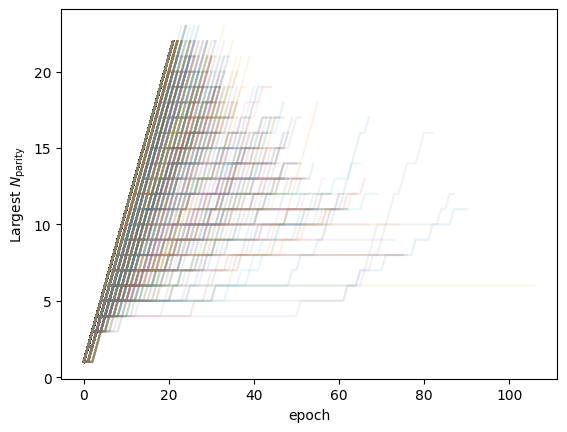

In [12]:
import matplotlib.pyplot as plt
for stat in stats:
    plt.plot(stat['len_accuracies'], alpha=0.1)

plt.xlabel('epoch')
plt.ylabel('Largest $N_{\\text{parity}}$')

Text(0, 0.5, 'Largest $N_{\\text{parity}}$')

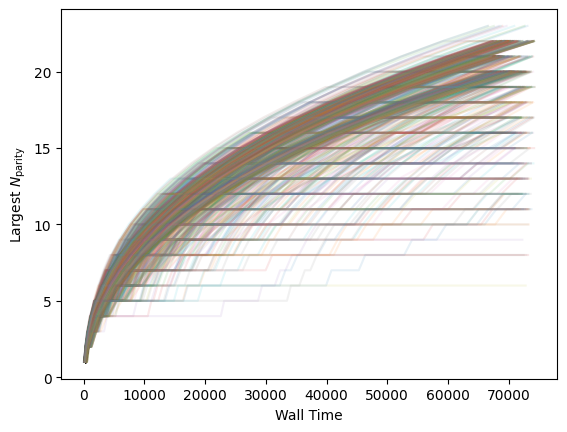

In [13]:
import matplotlib.pyplot as plt
for stat in stats:
    plt.plot(stat['time'], stat['len_accuracies'], alpha=0.1)

plt.xlabel('Wall Time')
plt.ylabel('Largest $N_{\\text{parity}}$')

In [14]:
# list(map(lambda x: x.tolist(), stat['accuracy']))

In [15]:
len(stats)

1250

In [16]:
configs_df.subdir

0        643_grow_parity__2024-Mar-05-13_20_19
1       1156_grow_parity__2024-Mar-05-13_26_11
2        507_grow_parity__2024-Mar-05-13_18_33
3       1099_grow_parity__2024-Mar-05-13_26_16
4        566_grow_parity__2024-Mar-05-13_19_44
                         ...                  
1245    1000_grow_parity__2024-Mar-05-13_26_11
1246    1207_grow_parity__2024-Mar-05-13_29_21
1247     812_grow_parity__2024-Mar-05-13_26_16
1248     280_grow_parity__2024-Mar-05-13_16_27
1249     150_grow_parity__2024-Mar-05-13_16_28
Name: subdir, Length: 1250, dtype: object

In [17]:
configs_df[configs_df.subdir.str.startswith('994')].iloc[0]

SEED                                                             0
NUM_EPOCHS                                                     200
BATCH_SIZE                                                     256
TRAINING_STEPS                                                 500
REPLICAS                                                         2
TEST_STEPS                                                      50
DEVICE                                                         cpu
CURRICULUM                                                    grow
LEARNING_RATE                                                  0.4
MOMENTUM                                                       0.3
FREEZING_STEPS                                                   1
GAMMA                                                          0.2
WEIGHT_NOISE                                                   0.1
BIAS_NOISE                                                    0.03
TAUS_NOISE                                                    

In [18]:
configs_df

,SEED,NUM_EPOCHS,BATCH_SIZE,TRAINING_STEPS,REPLICAS,TEST_STEPS,DEVICE,CURRICULUM,LEARNING_RATE,MOMENTUM,...,NET_SIZE,NUM_CLASSES,BIAS,NUM_READOUT_HEADS_PER_MOD,TRAIN_TAU,TASK,COMMIT_HASH,FILES_MODIFIED,BIAS_NIOSE,subdir
0,0,200,256,500,2,50,cpu,grow,0.3,0.1,...,5.0,2,True,1,True,parity,None,None,0.20,643_grow_parity__2024-Mar-05-13_20_19
1,0,200,256,500,2,50,cpu,grow,0.3,0.1,...,10.0,2,True,1,True,parity,None,None,0.01,1156_grow_parity__2024-Mar-05-13_26_11
2,0,200,256,500,2,50,cpu,grow,0.4,0.4,...,15.0,2,True,1,True,parity,None,None,0.20,507_grow_parity__2024-Mar-05-13_18_33
3,0,200,256,500,2,50,cpu,grow,0.2,0.1,...,15.0,2,True,1,True,parity,None,None,0.20,1099_grow_parity__2024-Mar-05-13_26_16
4,0,200,256,500,2,50,cpu,grow,0.1,0.4,...,10.0,2,True,1,True,parity,None,None,0.10,566_grow_parity__2024-Mar-05-13_19_44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,0,200,256,500,2,50,cpu,grow,0.4,0.3,...,15.0,2,True,1,True,parity,None,None,0.01,1000_grow_parity__2024-Mar-05-13_26_11
1246,0,200,256,500,2,50,cpu,grow,0.3,0.4,...,10.0,2,True,1,True,parity,None,None,0.20,1207_grow_parity__2024-Mar-05-13_29_21
1247,0,200,256,500,2,50,cpu,grow,0.1,0.3,...,30.0,2,True,1,True,parity,None,None,0.01,812_grow_parity__2024-Mar-05-13_26_16
1248,0,200,256,500,2,50,cpu,grow,0.1,0.2,...,15.0,2,True,1,True,parity,None,None,0.01,280_grow_parity__2024-Mar-05-13_16_27


In [48]:
if 'BIAS_NIOSE' in configs_df.columns:
    configs_df['BIAS_NOISE'] = configs_df['BIAS_NIOSE']

In [49]:
df = pd.merge(configs_df, stats_df, on='subdir')

In [50]:
df.head()

,SEED,NUM_EPOCHS,BATCH_SIZE,TRAINING_STEPS,REPLICAS,TEST_STEPS,DEVICE,CURRICULUM,LEARNING_RATE,MOMENTUM,...,COMMIT_HASH,FILES_MODIFIED,BIAS_NIOSE,subdir,loss,accuracy,time,epochs,max_N,len_accuracies
0,0,200,256,500,2,50,cpu,grow,0.3,0.1,...,None,None,0.20,643_grow_parity__2024-Mar-05-13_20_19,"[0.13188420415855945, 0.1876632080078125, 0.15...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[174.9330472946167, 415.98202109336853, 815.61...",28,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[1, 2, 3, 4, 5, 6, 7, 7, 7, 7, 7, 8, 9, 10, 10..."
1,0,200,256,500,2,50,cpu,grow,0.3,0.1,...,None,None,0.01,1156_grow_parity__2024-Mar-05-13_26_11,"[0.2883076078891754, 0.2760491908416152, 0.199...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[193.2250006198883, 473.14977407455444, 870.82...",21,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
2,0,200,256,500,2,50,cpu,grow,0.4,0.4,...,None,None,0.20,507_grow_parity__2024-Mar-05-13_18_33,"[0.06665384598751553, 0.0747792279162677, 0.06...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[191.15922737121582, 472.0433111190796, 1055.0...",20,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
3,0,200,256,500,2,50,cpu,grow,0.2,0.1,...,None,None,0.20,1099_grow_parity__2024-Mar-05-13_26_16,"[0.17909324598498644, 0.25991281381621956, 0.1...","[[tensor(100.)], [tensor(100.), tensor(100.)],...","[127.32323098182678, 366.1205279827118, 839.76...",20,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
4,0,200,256,500,2,50,cpu,grow,0.1,0.4,...,None,None,0.10,566_grow_parity__2024-Mar-05-13_19_44,"[0.46677773460745814, 0.11184300154447556, 0.3...","[[tensor(94.7344)], [tensor(100.)], [tensor(10...","[196.46630573272705, 382.30308961868286, 672.4...",22,"[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 1...","[1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,..."


In [51]:
for c in configs_df.columns:
    if len(configs_df[c].unique()) > 1:
        print(c, configs_df[c].unique(), '\n')

LEARNING_RATE [0.3 0.4 0.2 0.1] 

MOMENTUM [0.1 0.4 0.2 0.3] 

GAMMA [0.4  0.1  0.7  0.95 0.2 ] 

WEIGHT_NOISE [0.2  0.01 0.1  0.05] 

BIAS_NOISE [0.2  0.01 0.1  0.05] 

TAUS_NOISE [0.2  0.01 0.1  0.05] 

NET_SIZE [ 5. 10. 15. 30.] 

BIAS_NIOSE [0.2  0.01 0.1  0.05] 

subdir ['643_grow_parity__2024-Mar-05-13_20_19'
 '1156_grow_parity__2024-Mar-05-13_26_11'
 '507_grow_parity__2024-Mar-05-13_18_33' ...
 '812_grow_parity__2024-Mar-05-13_26_16'
 '280_grow_parity__2024-Mar-05-13_16_27'
 '150_grow_parity__2024-Mar-05-13_16_28'] 



In [96]:
df['epoch_index'] = df.epochs.apply(lambda x: list(range(x + 1)))
df.sort_values(['LEARNING_RATE', 'MOMENTUM', 'GAMMA', 'WEIGHT_NOISE', 'NET_SIZE'], inplace=True)

In [97]:
df.epoch_index

61      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
830     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
1129    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
1103    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
705     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
                              ...                        
83      [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
791     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
454     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
957     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
1112    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
Name: epoch_index, Length: 1250, dtype: object

In [107]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive, Dropdown, VBox, HBox
from matplotlib.lines import Line2D
import numpy as np

# # Create example DataFrame
# df = pd.DataFrame({
#     'ID': [1, 2, 3, 4, 5],
#     'Category': ['A', 'B', 'A', 'C', 'B'],
#     'Subcategory': ['X', 'Y', 'X', 'Z', 'Y'],
#     'Values': [np.random.rand(5).tolist() for _ in range(5)]
# })

# Function to create dropdown widgets for specified columns
def create_dropdowns(columns):
    dropdowns = {}
    for col in columns:
        dropdown = Dropdown(options=['All'] + sorted(df[col].unique()), description=col+':')
        dropdowns[col] = dropdown
    return dropdowns

# Function to plot data based on dropdown selections
def plot_data(**kwargs):
    x_col = kwargs.pop('x_col')
    # y_col = kwargs.pop(y_col)
    color_by = kwargs.pop('Color Lines By')
    filtered_df = df.copy()
    filters = []
    for col, value in kwargs.items():
        if value != 'All':
            filtered_df = filtered_df[filtered_df[col] == value]
            filters.append(f'{col}={value}')
    
    print("Number of items left: ", len(filtered_df))
    if not filtered_df.empty:
        fig, ax = plt.subplots(figsize=(10, 6))
        plotted_with_labels = False
        if color_by == 'None':
            # Plot without differentiating colors
            for _, row in filtered_df.iterrows():
                ax.plot(row[x_col], row['len_accuracies'] , marker='o', linestyle='-')
        else:
            unique_values = sorted(filtered_df[color_by].unique())
            norm = plt.Normalize(0, len(unique_values)-1)
            scalar_map = plt.cm.ScalarMappable(norm=norm, cmap='viridis')
            colors = plt.cm.viridis(np.linspace(0, 1, len(unique_values)))
            plots = []
            for value, color in zip(unique_values, colors):
                for j, row in filtered_df[filtered_df[color_by] == value].iterrows():
                    color_value = f'{value}' if j == 0 else '_nolegend_'
                    # print(value, color_value)
                    ax.plot(row[x_col], row['len_accuracies'], marker='o', linestyle='-', color=color, label=color_value, alpha=0.3)
                    # plots.append(p)
                    plotted_with_labels = True
        if plotted_with_labels:
            legend_elements = [Line2D([0], [0], color=scalar_map.to_rgba(i), lw=2, label=category) for i, category in enumerate(unique_values)]
            ax.legend(title=color_by, handles=legend_elements)
        ax.set_title(f'Filters: ' + ';'.join(filters))
        ax.set_xlabel('Index')
        ax.set_ylabel('Values')
        ax.grid(True)
        x_max = max(df[x_col].apply(max))
        y_max = max(df['len_accuracies'].apply(max))
        plt.xlim([0, x_max])
        plt.ylim([0, y_max + 1])
        fig.show()
            # print(plots)

        
# Columns to use for selectors
selector_columns = ['MOMENTUM', 'LEARNING_RATE', 'DUPLICATE_TAUS', 'WEIGHT_NOISE', 'GAMMA', 'NET_SIZE']
color_by_columns = ['MOMENTUM', 'LEARNING_RATE', 'DUPLICATE_TAUS', 'WEIGHT_NOISE', 'GAMMA', 'NET_SIZE']

x_cols = ['epoch_index', 'time']
y_cols = ['len_accuracies']

# Create dropdown widgets
dropdowns = {col: Dropdown(options=['All'] + sorted(df[col].unique()), description=col+':') for col in selector_columns}

color_by_dropdown = Dropdown(options=['None'] + color_by_columns, description='Color Lines By:')

x_cols = Dropdown(options=x_cols, description='x_col')

all_widgets = {**dropdowns, **{'Color Lines By': color_by_dropdown}, **{'x_col': x_cols}}
# Create interactive widget
interactive_plot = interactive(plot_data, **all_widgets)

# Display widgets and interactive plot
# display(VBox([HBox([v for v in dropdowns.values()]), color_by_dropdown]), interactive_plot)
display(interactive_plot)


interactive(children=(Dropdown(description='MOMENTUM:', options=('All', 0.1, 0.2, 0.3, 0.4), value='All'), Dro…